In [68]:
pip install requests beautifulsoup4 requests-html

In [69]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [70]:
url = requests.get('https://www.cbc.ca/news/world')
soup = BeautifulSoup(url.content, 'html.parser')

Scrapping keywords, taking reference from Will's code on Day6 web scrapping


In [71]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

In [73]:
def topic_detection(sentence):
    Israel_Keywords =('Israel','Jewish','Jews')
    Palestine_Keywords =('Gaza','Palestine','Rafah','Muslim','Palestinian')
    Hamas_Keywords= ('Hamas')
    Israel = any(sentence.count(i)>0 for i in Israel_Keywords)
    Palestine = any(sentence.count(i)>0 for i in Palestine_Keywords)
    Hamas = any(sentence.count(i)>0 for i in Hamas_Keywords)
    topics = []
    if Israel == True:
        topics.append("Israel")
    if Palestine == True:
        topics.append("Palestine")
    if Hamas == True:
        topics.append('Hamas')
    return topics


In [74]:
url = 'https://www.cbc.ca/news/world'
paragraphs = parse_elements(url, 'h3')
links = parse_elements(url, 'a')

In [75]:
type(paragraphs[0])

requests_html.Element

In [76]:

#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
topic_list = []
for i in range(0, len(paragraphs)):
    if len(paragraphs[i].text) > 50:
      p_list.append(paragraphs[i].text)
      topic_list.append(topic_detection(paragraphs[i].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list

In [77]:
p_dictionary['Topics']

[['Palestine', 'Hamas'],
 ['Palestine', 'Hamas'],
 ['Hamas'],
 ['Palestine', 'Hamas'],
 ['Palestine', 'Hamas'],
 ['Israel', 'Palestine', 'Hamas'],
 ['Palestine', 'Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Palestine', 'Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Palestine', 'Hamas'],
 ['Hamas'],
 ['Israel', 'Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Israel', 'Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas'],
 ['Hamas']]

In [78]:
df = pd.DataFrame(p_dictionary)

In [93]:
df.head(9)

,Paragraphs,Topics,Hamas,Palestine,Israel
0,"Some foreign nationals, but no Canadians, able...","[Palestine, Hamas]",1,1,0
1,"Some foreign nationals, but no Canadians, able...","[Palestine, Hamas]",1,1,0
2,Family member of Hamas hostages wants uncondit...,[Hamas],1,0,0
3,"Dwindling supplies, damaged hospitals in Gaza ...","[Palestine, Hamas]",1,1,0
4,"'I don't have hope,' says Palestinian Canadian...","[Palestine, Hamas]",1,1,0
5,Israel confirms it struck Jabalia refugee camp...,"[Israel, Palestine, Hamas]",1,1,0
6,IN PHOTOS | More kids killed in Gaza in 3 week...,"[Palestine, Hamas]",1,1,0
7,Ukraine army chief says war with Russia moving...,[Hamas],1,0,0
8,This U.S. town is considering a ban on all pub...,[Hamas],1,0,0


In [94]:
topics_amount = df['Topics'].value_counts()


In [95]:
print(topics_amount)

[Hamas]                       24
[Palestine, Hamas]             7
[Israel, Hamas]                2
[Israel, Palestine, Hamas]     1
Name: Topics, dtype: int64


getting the count separately

In [96]:
df['Hamas'] = df['Topics'].apply(lambda x:1 if 'Hamas' in x else 0)

In [97]:
df['Palestine'] = df['Topics'].apply(lambda x:1 if 'Palestine' in x else 0)

In [98]:
df['Israel'] = df['Topics'].apply(lambda x:1 if 'Israel' in x else 0)

In [99]:
df

,Paragraphs,Topics,Hamas,Palestine,Israel
0,"Some foreign nationals, but no Canadians, able...","[Palestine, Hamas]",1,1,0
1,"Some foreign nationals, but no Canadians, able...","[Palestine, Hamas]",1,1,0
2,Family member of Hamas hostages wants uncondit...,[Hamas],1,0,0
3,"Dwindling supplies, damaged hospitals in Gaza ...","[Palestine, Hamas]",1,1,0
4,"'I don't have hope,' says Palestinian Canadian...","[Palestine, Hamas]",1,1,0
5,Israel confirms it struck Jabalia refugee camp...,"[Israel, Palestine, Hamas]",1,1,1
6,IN PHOTOS | More kids killed in Gaza in 3 week...,"[Palestine, Hamas]",1,1,0
7,Ukraine army chief says war with Russia moving...,[Hamas],1,0,0
8,This U.S. town is considering a ban on all pub...,[Hamas],1,0,0
9,"Montreal couple, U.S. man charged in New York ...",[Hamas],1,0,0


In [100]:
df.drop([0])

,Paragraphs,Topics,Hamas,Palestine,Israel
1,"Some foreign nationals, but no Canadians, able...","[Palestine, Hamas]",1,1,0
2,Family member of Hamas hostages wants uncondit...,[Hamas],1,0,0
3,"Dwindling supplies, damaged hospitals in Gaza ...","[Palestine, Hamas]",1,1,0
4,"'I don't have hope,' says Palestinian Canadian...","[Palestine, Hamas]",1,1,0
5,Israel confirms it struck Jabalia refugee camp...,"[Israel, Palestine, Hamas]",1,1,1
6,IN PHOTOS | More kids killed in Gaza in 3 week...,"[Palestine, Hamas]",1,1,0
7,Ukraine army chief says war with Russia moving...,[Hamas],1,0,0
8,This U.S. town is considering a ban on all pub...,[Hamas],1,0,0
9,"Montreal couple, U.S. man charged in New York ...",[Hamas],1,0,0
10,Trump 2024 and the U.S. Constitution's 'insurr...,[Hamas],1,0,0


In [101]:
topic_counts = [df['Palestine'].sum(), df['Israel'].sum(),df['Hamas'].sum()]
topic_labels = ['Palestine', 'Israel', 'Hamas']

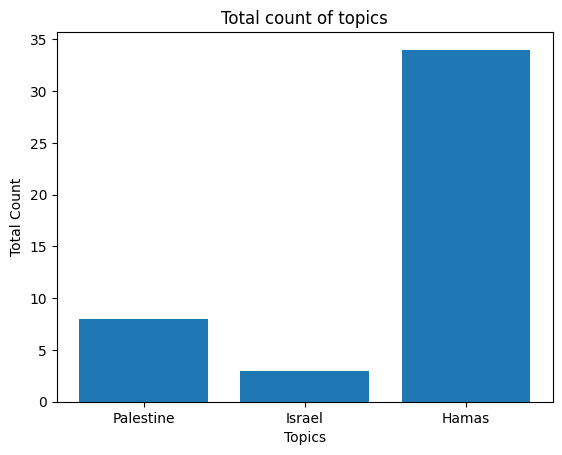

In [103]:
# Plotting the bar graph
plt.bar(topic_labels, topic_counts)

# Customize the plot
plt.xlabel('Topics')
plt.ylabel('Total Count')
plt.title('Total count of topics')

# Show the plot
plt.show()